In [15]:
!pip install thinknum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from thinknum import Query
q = Query(
    client_id='c1047ee75300c131fe71',
    client_secret='1d63542fbe2472cf215aa32db5e09ef5b1e6a5ca'
)

q.add_ticker('nasdaq:nflx')
nflx=q.get_data(dataset_id='job_listings') 
col= [i['display_name'] for i in nflx['group_fields']]
df=pd.DataFrame(nflx['rows'], columns = col)

In [89]:
df.columns

Index(['Ticker Symbol', 'Entity Name', 'CUSIP', 'ISIN', 'Unique ID',
       'Listing ID', 'Domain', 'As Of Date', 'Title', 'URL', 'Brand',
       'Category', 'Location Text', 'City', 'State', 'Country', 'Posted Date',
       'Number of Openings', 'Description', 'Salary', 'Salary Currency',
       'Salary Description', 'Coordinates', 'Date Added', 'Date Updated',
       'Sector', 'Industry', 'GICS Sector', 'GICS Industry', 'ICB Industry',
       'ICB Sector'],
      dtype='object')

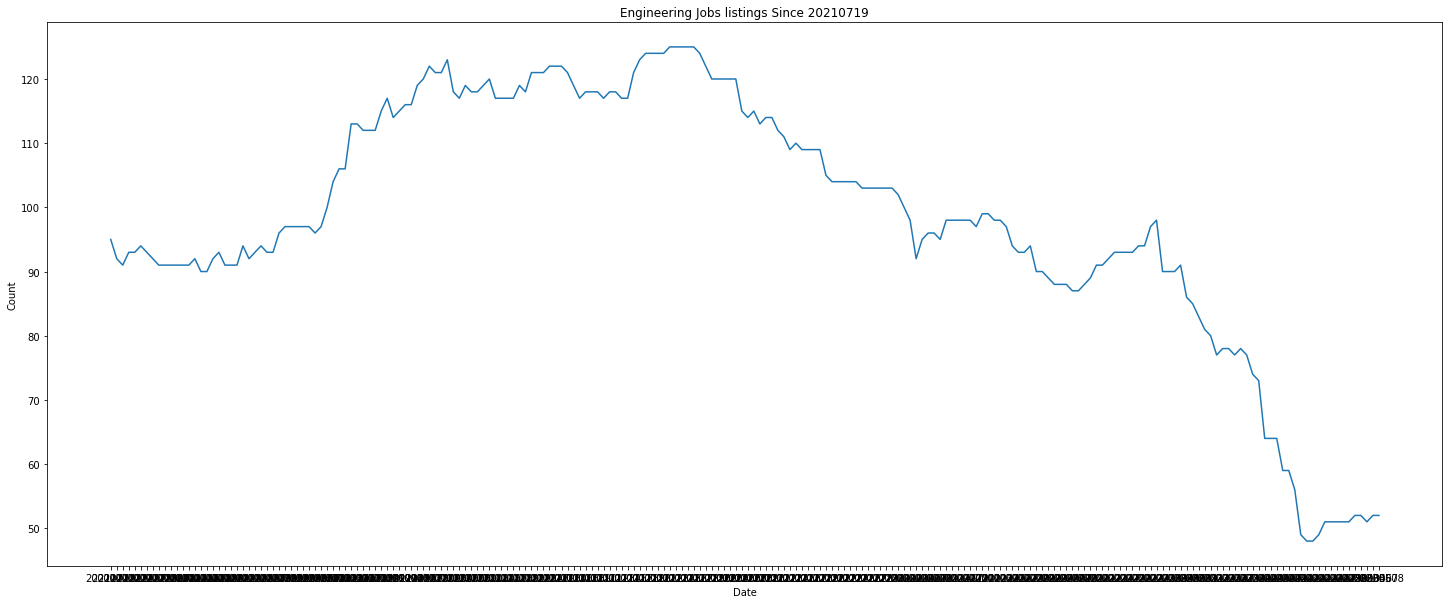

In [158]:
#engineering jobs
engineer_jobs=df[df['Title'].str.contains("Engineer", "Engineering")]
engineer=engineer_jobs.groupby('As Of Date')['URL'].count()
engineer=engineer[1:]
engineer_dates=engineer.index
plt.figure(figsize=(25,10))
plt.title('Engineering Jobs listings Since ' + engineer_dates.min())
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(engineer_dates,engineer)

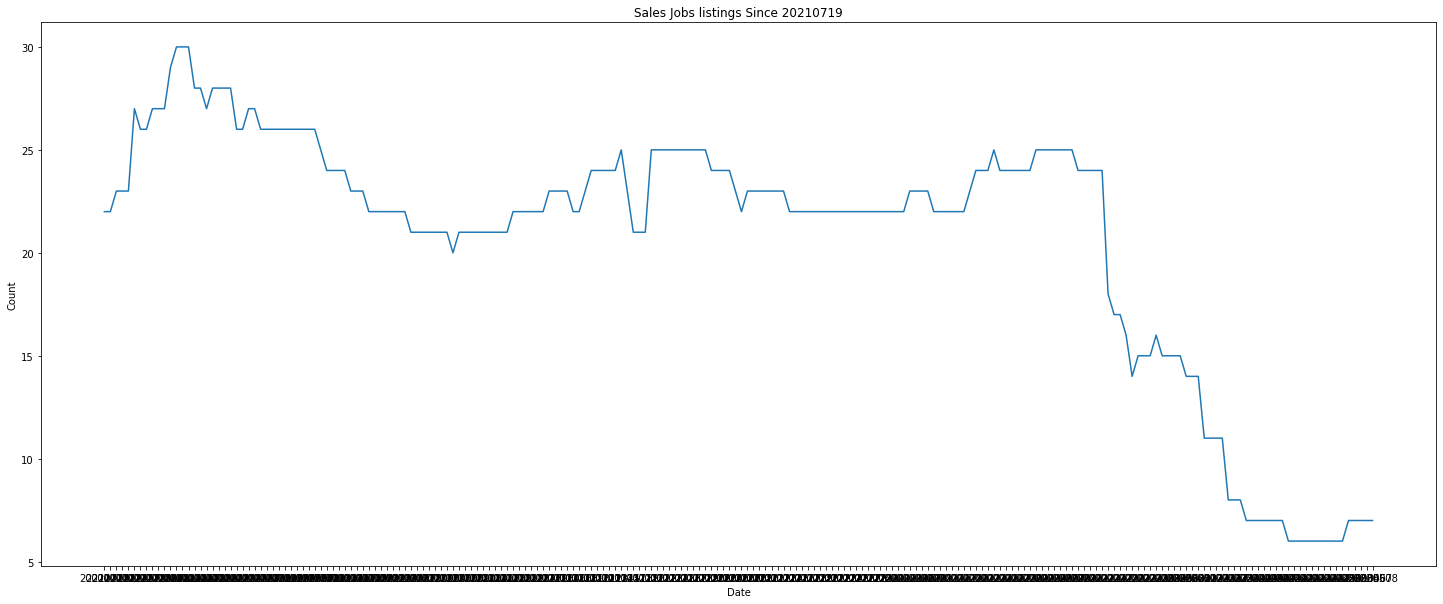

In [76]:
#sales jobs
sales_jobs=df[df['Title'].str.contains("Business", "Account")]
sales=sales_jobs.groupby('As Of Date')['URL'].count()
sales_dates=sales.index
plt.figure(figsize=(25,10))
plt.title('Sales Jobs listings Since ' + sales_dates.min())
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(sales_dates, sales)

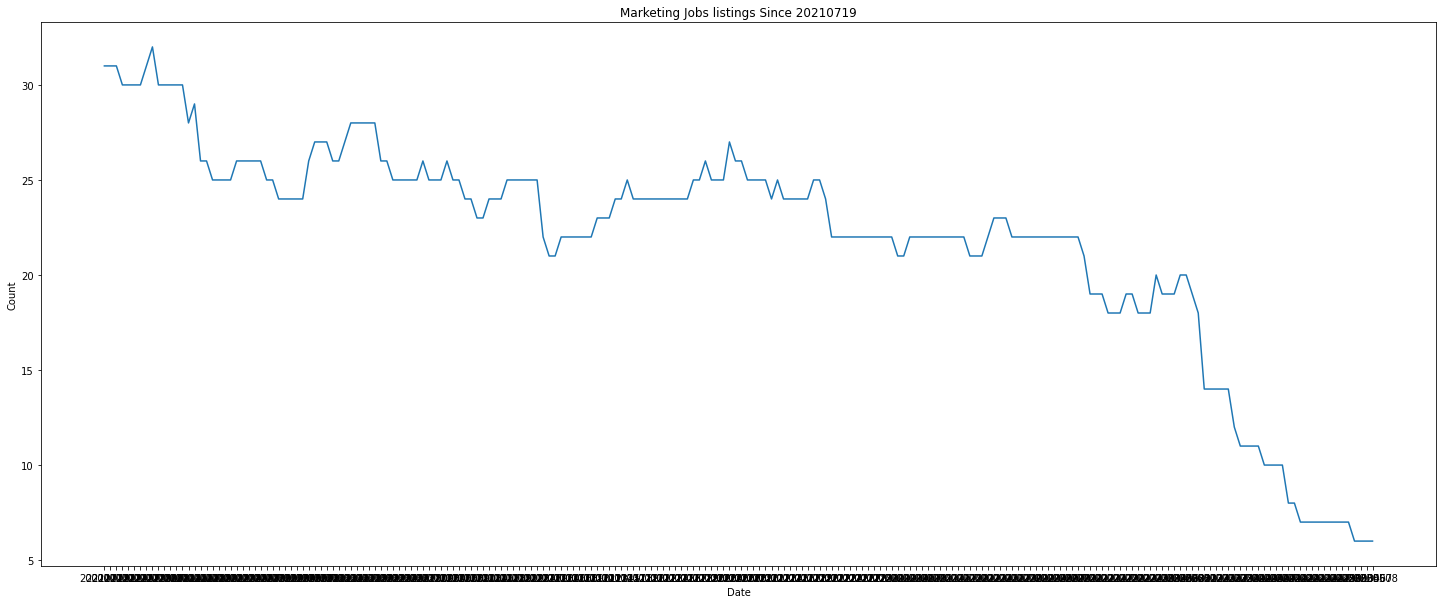

In [85]:
#marketing jobs
marketing_jobs=df[df['Title'].str.contains("Marketing")]
marketing=marketing_jobs.groupby('As Of Date')['URL'].count()
marketing_dates=marketing.index
plt.figure(figsize=(25,10))
plt.title('Marketing Jobs listings Since ' + marketing_dates.min())
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(marketing_dates, marketing)

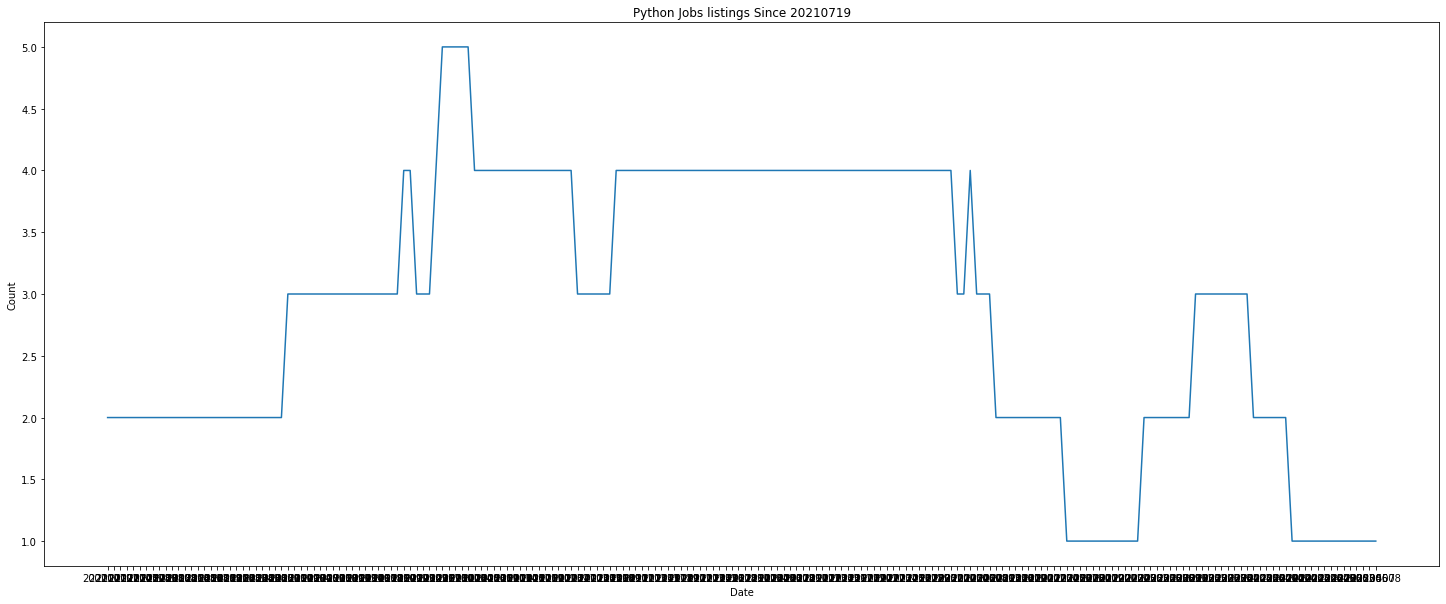

In [80]:
#python jobs
python_jobs=df[df['Description'].str.contains("Python", "python")]
python=python_jobs.groupby("As Of Date")['URL'].count()
python_dates=python.index
plt.figure(figsize=(25,10))
plt.title('Python Jobs listings Since ' + python_dates.min())
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(python_dates, python)

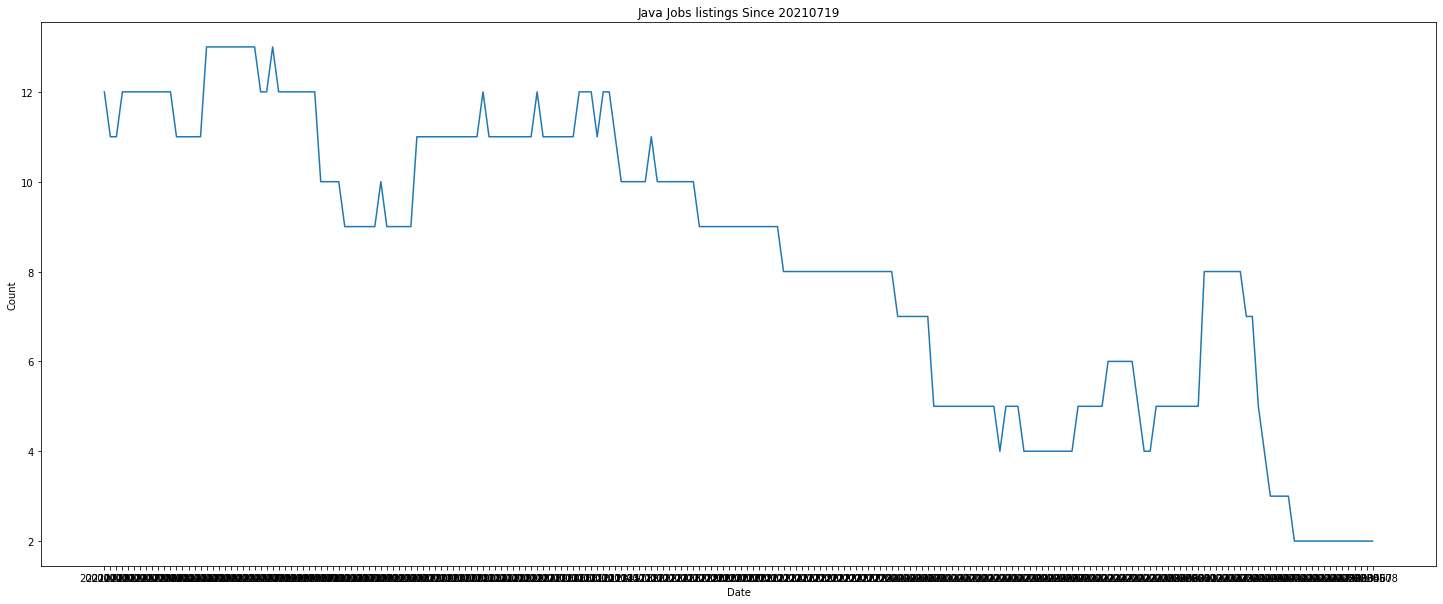

In [86]:
#python jobs
java_jobs=df[df['Description'].str.contains("Java", "java")]
java=java_jobs.groupby("As Of Date")['URL'].count()
java_dates=java.index
plt.figure(figsize=(25,10))
plt.title('Java Jobs listings Since ' + java_dates.min())
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(java_dates, java)

In [84]:
pd.DataFrame(df.groupby('Title')['URL'].count())

,URL
Title,
(Contract) Anime Production Finance Coordinator (JET Program) - Japan,45
(Contract) Consumer Products APAC Marketing Manager,28
"(Contract) Coordinator, Production Finance (JET Program)",14
"(Contract) Coordinator, Production Finance (JET Program) - Japan",14
"(Contract) Coordinator, Production Finance (JET Program) - Korea",33
...,...
Writer - Games,3
Writer - Games Studio,1
Writer - Night School Studio,2


In [95]:
#create yyyymmdd format for dates
date=df['As Of Date']
i=0
date_n=[]

for x in date:
    date_n.append(date[i][0:8])
    i=i+1
df['Date']=date_n

In [98]:
todays_jobs=df[df['Date']==df['Date'][0]]

countries=todays_jobs.groupby('Country')['URL'].count()
countries

Country
COL      1
DEU      1
FRA      1
GBR      4
IND      4
JPN      6
KOR     14
MEX     10
NLD     13
PHL      8
SWE      1
THA      4
TUR      1
TWN      1
USA    137
Name: URL, dtype: int64

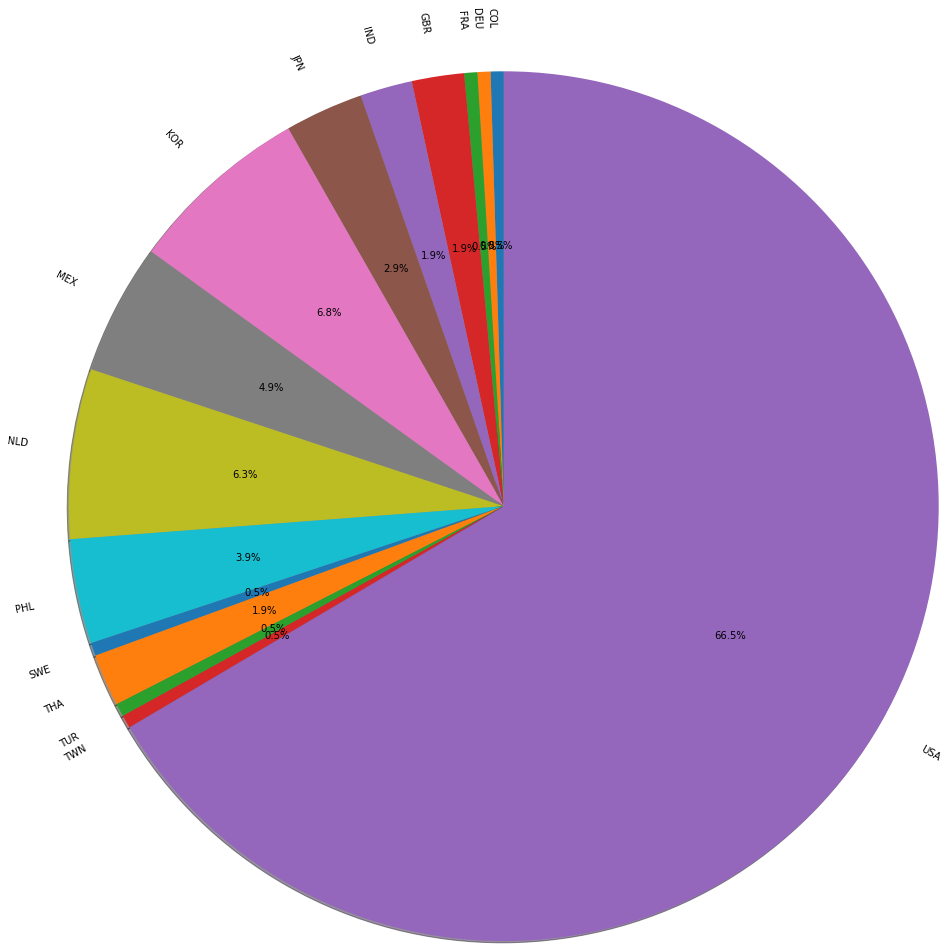

In [139]:
labels=countries.index

fig1, ax1 = plt.subplots()
ax1.pie(countries, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=5, labeldistance=1.1, rotatelabels=True)
plt.show()


<AxesSubplot:xlabel='Country'>

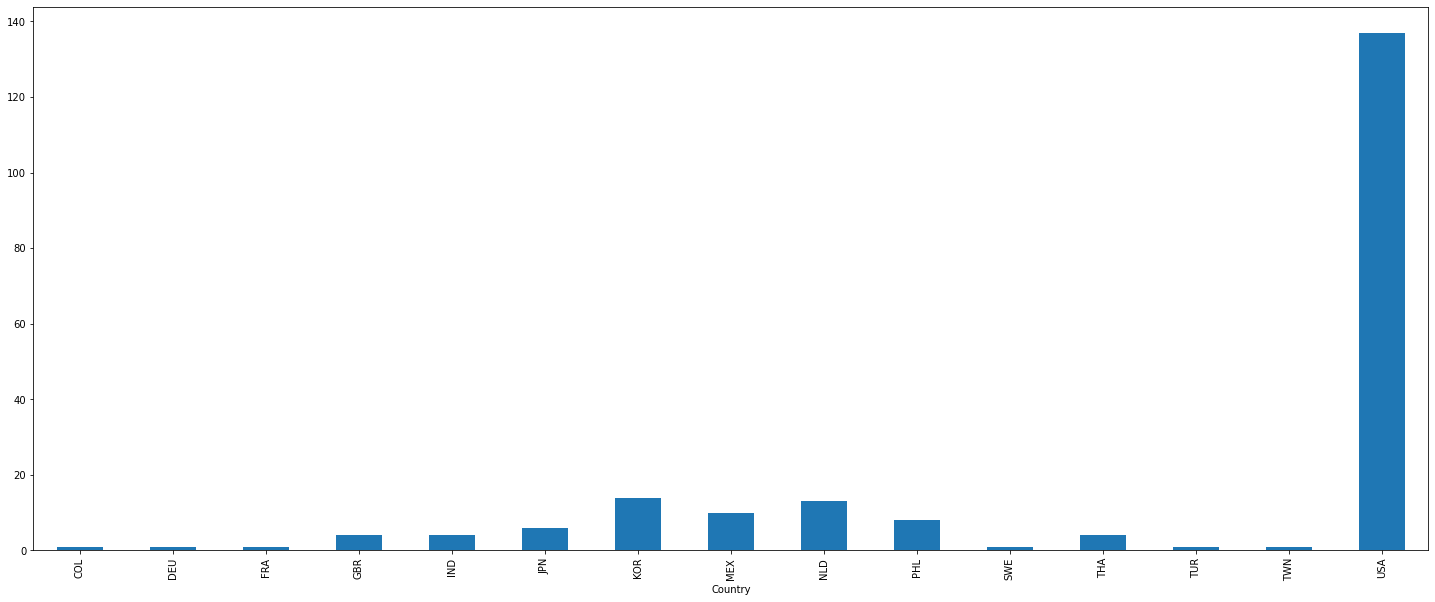

In [143]:
plt.figure(figsize=(25,10))
countries.plot.bar(x=labels, y=countries)

In [150]:
df[['Country','URL','As Of Date']]

,Country,URL,As Of Date
0,None,https://jobs.lever.co/netflix/61c9840f-e2b5-42...,20220508
1,None,https://jobs.lever.co/netflix/097e6d70-e9f4-47...,20220508
2,None,https://jobs.lever.co/netflix/8ba770fe-ce96-47...,20220508
3,None,https://jobs.lever.co/netflix/c03b0df2-bde7-49...,20220508
4,None,https://jobs.lever.co/netflix/aeccf186-bc27-4c...,20220508
...,...,...,...
99995,USA,https://jobs.lever.co/netflix/f3e94c70-322e-49...,20210717
99996,USA,https://jobs.lever.co/netflix/85aaa802-5c4b-44...,20210717
99997,USA,https://jobs.lever.co/netflix/f93dff8a-27ee-46...,20210717
99998,USA,https://jobs.lever.co/netflix/54e45ce8-8714-43...,20210717


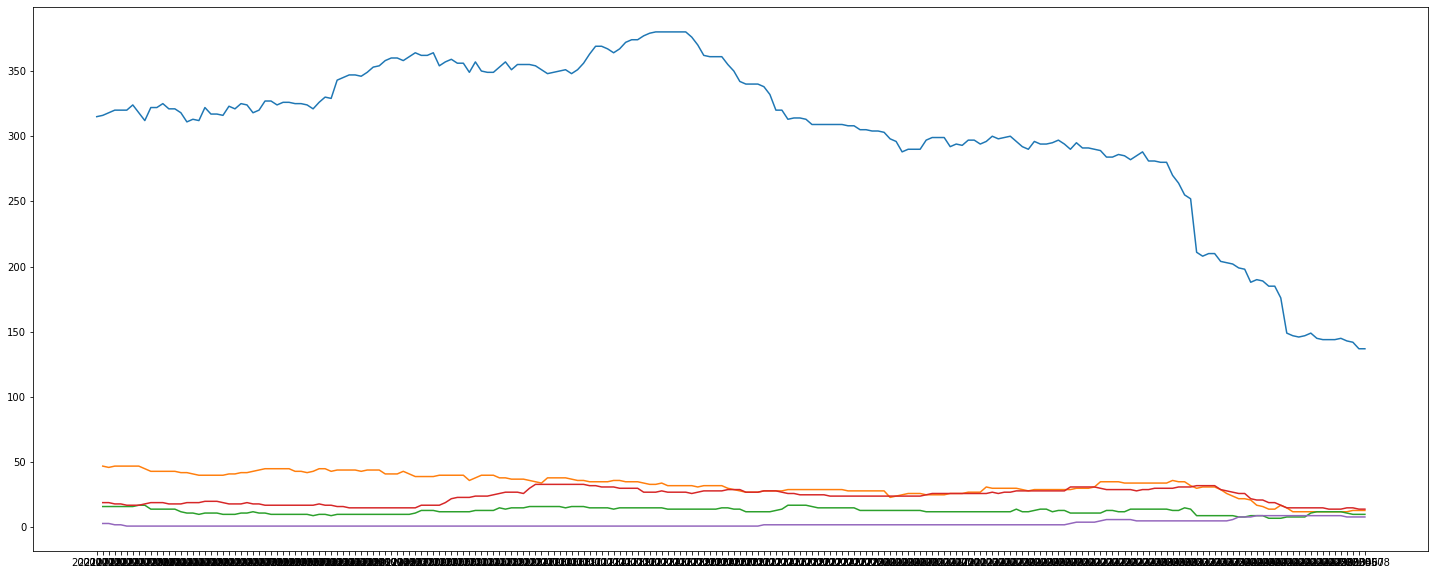

In [166]:
#jobs in the USA ofver time

usa_jobs=df[df['Country']=='USA']
usa=usa_jobs.groupby('As Of Date')['URL'].count()
usa=usa[1:]

nld_jobs=df[df['Country']=='NLD']
nld=nld_jobs.groupby('As Of Date')['URL'].count()
nld=nld[1:]

mex_jobs=df[df['Country']=='MEX']
mex=mex_jobs.groupby('As Of Date')['URL'].count()
mex=mex[1:]

kor_jobs=df[df['Country']=='KOR']
kor=kor_jobs.groupby('As Of Date')['URL'].count()
kor=kor[1:]

phl_jobs=df[df['Country']=='PHL']
phl=phl_jobs.groupby('As Of Date')['URL'].count()
phl=phl[1:]

plt.figure(figsize=(25,10))
plt.plot(usa.index,usa)
plt.plot(nld.index,nld)
plt.plot(mex.index,mex)
plt.plot(kor.index,kor)
plt.plot(phl.index,phl)

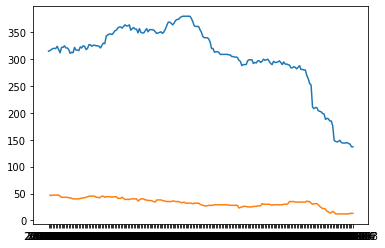